# Malicious ClusterScan

Describes/summarizes the or set of clusters. Useful for when you aim to enlist the summarized malware types found in each cluster in order by Type # as presented in VirusTotal such that the first ones on the list per cluster are Type 1 (most popular), followed by Type 2 then Type 3 (least popular).

Note that this notebook only makes use of the verified xxxx_SampleHash_Common.csv file which represents a significant majority of the entire Oliveira dataset.  

## Import Libraries/Datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.rcParams["figure.autolayout"] = True

malicious_df = pd.read_csv('./Clean_Manual_DBSCAN_woFalseLabel_SampleHash_Common.csv', low_memory=False, index_col=False) #This should point to a VirusTotal verified <Data Clustering>_SampleHash_Common.csv file

#Load list of API calls
API_LIST = "../api_calls.txt"
DELIMITER = "NaN"
API_FILE = open(API_LIST,"r")
APIS = API_FILE.readline().split(',')
APIS.append(DELIMITER) #serves as a label for NaN values for Instance-based datasets
API_FILE.close()

def list_to_str(ls:list):
    output = ""
    for l in ls:
        output += str(l) + " "
    return output[0:len(output)-1]

def inject_patterns(inner_df:pd.DataFrame):
    patterns = []
    for row in range(inner_df.shape[0]):
        patterns.append(list_to_str(inner_df.iloc[row,2:5].transpose().to_list()))
    inner_df['type_pattern'] = patterns
    return inner_df

def get_unique_clusters(df:pd.DataFrame):
    return list(df['cluster'].unique())

def get_summary(df:pd.DataFrame):
    #Identify the overall list of types each cluster is as designated by VirusTotal.
    unique_clusters = get_unique_clusters(df)
    summary = []
    for u in unique_clusters:
        cluster_sublist = [u]
        df_copy = malicious_df[malicious_df['cluster'] == u].copy(deep=True)
        idx = list(df_copy['Type 1'].value_counts().index)
        counts = list(df_copy['Type 1'].value_counts())
        type_sublist = []
        for i in range(len(idx)):
            type_sublist.append([idx[i], counts[i]])
        cluster_sublist.append(type_sublist)
        # str_summary = []
        # cluster_sublist.append(list(df_copy['type_pattern'].value_counts().index))
        # cluster_sublist.append(list(df_copy['type_pattern'].value_counts()))
        summary.append(cluster_sublist)
    return summary

DELIMITER = "NaN"
API_FILE = open(API_LIST,"r")
APIS = API_FILE.readline().split(',')
APIS.append(DELIMITER) #serves as a label for NaN values for Instance-based datasets
API_FILE.close()

from sklearn.preprocessing import LabelEncoder
#Inverse Label Encoding
def inverse_label(item):
    global APIS
    return item.map(lambda x: APIS[int(x)])
oliveira = pd.read_csv('../oliveira.csv', low_memory=False)
oliveira.iloc[:, 1:101] = oliveira.iloc[:, 1:101].apply(inverse_label, axis=1, result_type='reduce')

def how_many_clusters():
    c = malicious_df['cluster'].unique()
    c.sort()
    print("Number of Clusters:", c.size)
    c = malicious_df['cluster'].value_counts(ascending=True)
    print("Number of single-item Clusters:", c[c==1].count())
    print("Number of Samples Remaining:", malicious_df.shape[0])

C:\Users\ejose\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## DataFrame Preview

,cluster,hash,Type 1,Type 2,Type 3,pattern
0,0,071e8c3f8922e186e57548cd4c703a5d,trojan,_,_,"RegOpenKeyExA,NtOpenKey,NtQueryValueKey,NtClos..."
1,1,33f8e6d08a6aae939f25a8e0d63dd523,pua,_,_,"GetSystemTimeAsFileTime,NtAllocateVirtualMemor..."
2,2,b68abd064e975e1c6d5f25e748663076,trojan,_,_,"SetUnhandledExceptionFilter,OleInitialize,LdrL..."
3,3,72049be7bd30ea61297ea624ae198067,trojan,_,_,"GetSystemTimeAsFileTime,NtAllocateVirtualMemor..."
4,4,c9b3700a77facf29172f32df6bc77f48,trojan,_,_,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce..."
5,5,cc6217be863e606e49da90fee2252f52,trojan,_,_,"LdrGetProcedureAddress,NtAllocateVirtualMemory..."
6,6,f7a1a3c38809d807b3f5f4cc00b1e9b7,downloader,_,_,"NtClose,NtOpenKey,NtQueryValueKey,NtClose,NtOp..."
7,7,164b56522eb24164184460f8523ed7e2,adware,_,_,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce..."
8,8,56ae1459ba61a14eb119982d6ec793d7,adware,_,_,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce..."
9,9,c4148ca91c5246a8707a1ac1fd1e2e36,downloader,_,_,"GetSystemTimeAsFileTime,NtAllocateVirtualMemor..."


(40218, 6)

<Axes: ylabel='Type 1'>

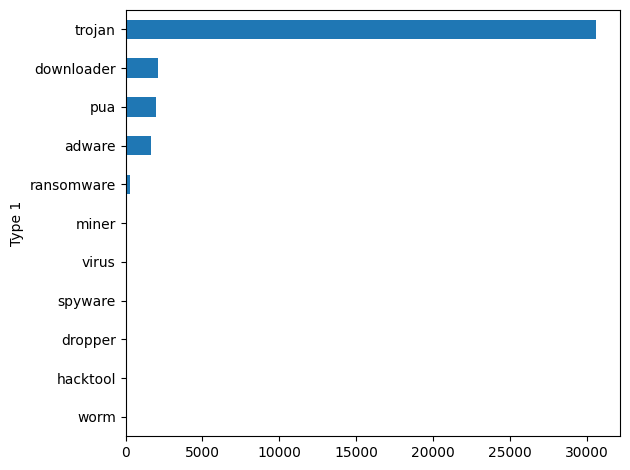

In [2]:
#Replace '-' empty malware type delimiter with '_' for consistency
malicious_df.replace(to_replace='-',value='_', inplace=True)
display(malicious_df.head(10))
display(malicious_df.shape)
malicious_df['Type 1'].value_counts(ascending=True).plot(kind='barh')

In [3]:
#INJECT PATTERN (i.e., summarized malware type pattern) to the DataFrame
malicious_df = inject_patterns(malicious_df)

print("Raw Clustered malicious samples")
how_many_clusters()

#DROP ROWS THAT ARE FALSELY LABELLED. (i.e. '_' on all popularity levels of VirusTotal)
malicious_df.drop(malicious_df[(malicious_df['Type 1']=='_')].index, inplace=True)

print("After removing falsely labelled malicious samples")
how_many_clusters()

Raw Clustered malicious samples
Number of Clusters: 11523
Number of single-item Clusters: 9550
Number of Samples Remaining: 40218
After removing falsely labelled malicious samples
Number of Clusters: 11523
Number of single-item Clusters: 9550
Number of Samples Remaining: 40218


## "What Malware Types can be found in the overall dataset?"

### This is regardless of cluster.

Type 1
trojan        30627
downloader     2080
pua            1990
adware         1648
ransomware      314
miner           121
virus            71
spyware          45
hacktool          4
dropper           4
worm              2
Name: count, dtype: int64

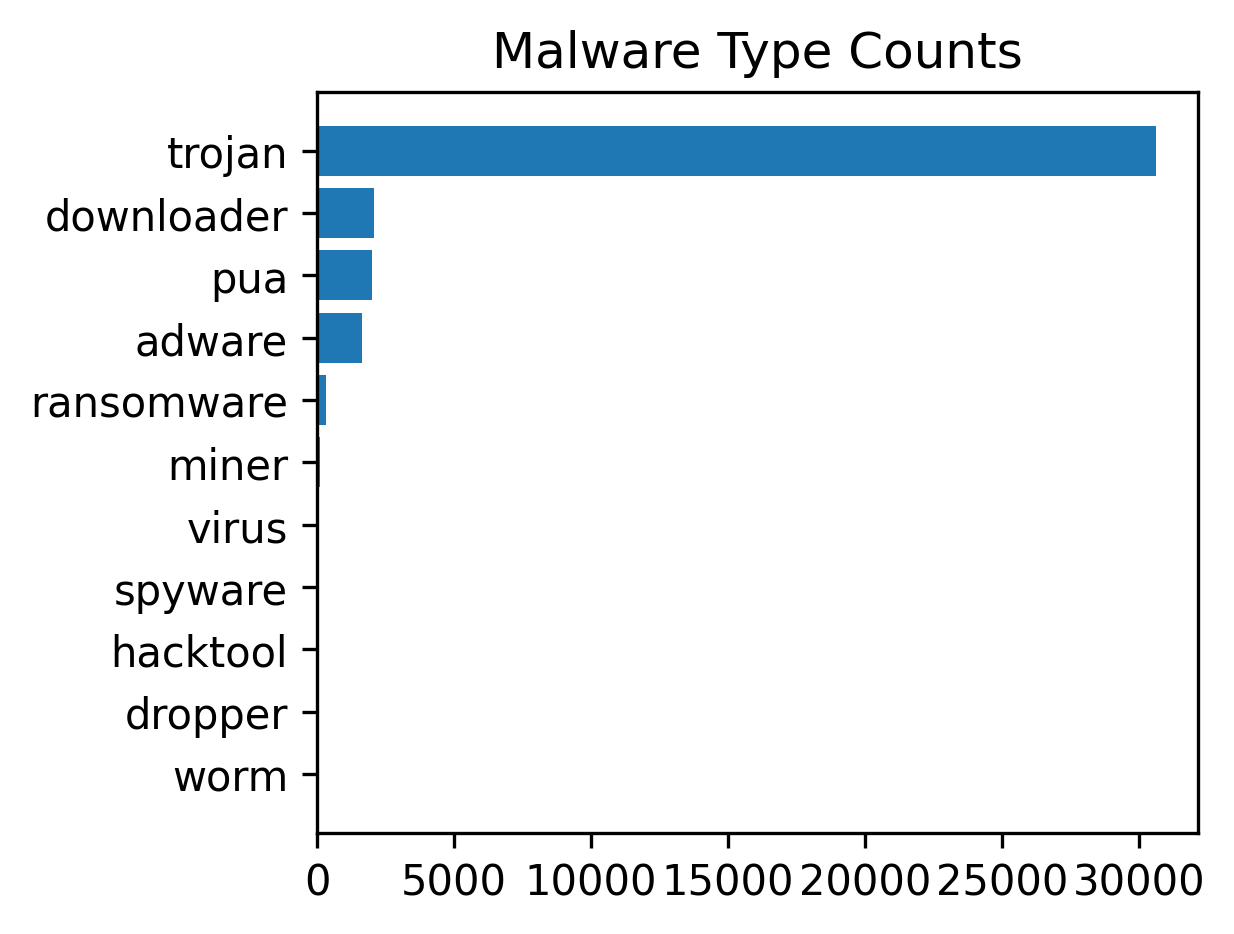

In [4]:
output = malicious_df['Type 1'].value_counts()
str_output = str(output) + "\n\n"
with open("./Output/1 MalwareTypes_in_Dataset.txt", 'w') as f:
    f.write(str_output)
    f.flush
    f.close()
display(output)
fig, axs = plt.subplots(nrows=1, layout='constrained')
fig.set_figwidth(4)
fig.set_figheight(3)
fig.set_dpi(300)
axs.set_title('Malware Type Counts')
axs.barh(malicious_df['Type 1'].value_counts().index, malicious_df['Type 1'].value_counts())
axs.invert_yaxis()
# axs[1].set_title('Type 2 Malware Type Counts')
# axs[1].invert_yaxis()
# axs[1].barh(malicious_df['Type 2'].value_counts().index, malicious_df['Type 2'].value_counts())
# axs[2].invert_yaxis()
# axs[2].set_title('Type 3 (Least \'Popular\') Malware Type Counts')
# axs[2].barh(malicious_df['Type 3'].value_counts().index, malicious_df['Type 3'].value_counts())
plt.savefig("./Output/1 Popular Malware Types in Dataset.png")

## How many clusters are there?

In [5]:
#Prior to noise removal

print("Prior to noise removal")
how_many_clusters()

Prior to noise removal
Number of Clusters: 11523
Number of single-item Clusters: 9550
Number of Samples Remaining: 40218


In [6]:
# DROP ROWS WITH NA TO HAVE CLEAN CLUSTERS
import numpy as nan
malicious_df.dropna(inplace=True, subset=['Type 1'])
malicious_df['Type 1'].unique()

# DROP CLUSTERS WITH MORE THAN 1 MALWARE TYPE UNDER IT (i.e. NOISE)
unique_clusters = get_unique_clusters(malicious_df)
for u in unique_clusters:
    if len(malicious_df[malicious_df['cluster'] == u]['Type 1'].unique()) > 1:
        malicious_df = malicious_df.drop(malicious_df[malicious_df['cluster'] == u].index)
# malicious_df.head()

print("After removing yet unlabelled malicious samples\n and clusters with more than 1 malware type")
how_many_clusters()

After removing yet unlabelled malicious samples
 and clusters with more than 1 malware type
Number of Clusters: 9880
Number of single-item Clusters: 8940
Number of Samples Remaining: 11627


In [7]:
# REMOVE SINGLE ITEM CLUSTERS
unique_clusters = get_unique_clusters(malicious_df)
for u in unique_clusters:
    if malicious_df[malicious_df['cluster'] == u].shape[0] == 1:
        malicious_df = malicious_df.drop(malicious_df[malicious_df['cluster'] == u].index)

print("After removing single-item clusters")
how_many_clusters()

After removing single-item clusters
Number of Clusters: 940
Number of single-item Clusters: 0
Number of Samples Remaining: 2687


## "What Malware Types are there in each cluster?"


### Identify the counts of Malware Types per Cluster

This indicates the malware types (including the # of instances) found in each cluster.

In [8]:
str_output = ""
summary = get_summary(malicious_df)
summary.sort()
for s in summary:
    str_output += f"CLUSTER {s[0]}: "
    for t in s[1]:
        str_output += f"{t[0]} ({t[1]}); "
    # str_output += "\n\tType 2: "
    # for t in s[2]:
    #     str_output += f"{t[0]} ({t[1]}); "
    # str_output += "\n\tType 3: "
    # for t in s[3]:
    #     str_output += f"{t[0]} ({t[1]}); "
    # str_output += "\n\tMost Popular Malware Type Combination (in order Most to Least):\n"
    # for i,t in enumerate(s[4]):
    #     str_output += f"\t    {i+1} {t:12s} ({s[5][i]})\n"
    str_output += "\n"
with open("./Output/1 MalwareType_per_Cluster_woNoise.txt", 'w') as f:
    f.write(str_output)
    f.flush
    f.close()
print(str_output)

CLUSTER 2: trojan (8); 
CLUSTER 11: trojan (8); 
CLUSTER 40: trojan (2); 
CLUSTER 56: trojan (5); 
CLUSTER 67: trojan (2); 
CLUSTER 69: trojan (3); 
CLUSTER 73: trojan (3); 
CLUSTER 85: trojan (4); 
CLUSTER 89: trojan (12); 
CLUSTER 90: trojan (7); 
CLUSTER 97: trojan (3); 
CLUSTER 98: trojan (2); 
CLUSTER 104: trojan (4); 
CLUSTER 115: trojan (5); 
CLUSTER 124: trojan (3); 
CLUSTER 140: trojan (6); 
CLUSTER 142: trojan (10); 
CLUSTER 159: trojan (10); 
CLUSTER 162: trojan (3); 
CLUSTER 172: trojan (3); 
CLUSTER 179: trojan (2); 
CLUSTER 185: trojan (2); 
CLUSTER 188: trojan (3); 
CLUSTER 191: trojan (2); 
CLUSTER 194: trojan (4); 
CLUSTER 208: trojan (6); 
CLUSTER 213: trojan (3); 
CLUSTER 216: trojan (21); 
CLUSTER 219: trojan (8); 
CLUSTER 233: trojan (6); 
CLUSTER 237: trojan (3); 
CLUSTER 247: trojan (3); 
CLUSTER 255: trojan (7); 
CLUSTER 259: trojan (2); 
CLUSTER 261: trojan (2); 
CLUSTER 275: trojan (2); 
CLUSTER 277: trojan (9); 
CLUSTER 281: trojan (3); 
CLUSTER 289: trojan (

### Identify the Clusters that have the same Unique Malware Type

This indicates what clusters have verified malicious samples that match specific Malware Types.

This indicates the most occuring Malware Type which extends to the most 'popular' malware type that is probably found in the dataset.

Such findings may also be used as a reflection as to what malware types are most prevalent in the wild.

In [9]:
# Summarize Clusters that have the same malware types as per VirusTotal.
str_output = f"# of Unique Malware Type: {len(malicious_df['Type 1'].unique())}" + "\n\n"

cluster_instance_summary = [0] * len(list(malicious_df['cluster'].unique()))
count_summary = []
for i, u in enumerate(list(malicious_df['Type 1'].unique())):
    matching = malicious_df[malicious_df['Type 1'] == u]['cluster']
    count_summary.append([u, len(list(matching)), len(list(matching.unique())) ,str(list(matching.unique()))])
    str_output += f"Unique Malware Type: {i+1}".upper() + "\n"
    str_output += f"Malware Type: {u}" + "\n"
    str_output += f"Matching Clusters Count: {len(list(matching.unique()))}" + "\n"
    str_output += f"Matching Clusters: {list(matching.unique())}" + "\n"
    str_output += "\n"
with open("./Output/1 Clusters_on_Unique_MalwareType_woNoise.txt", 'w') as f:
    f.write(str_output)
    f.flush
    f.close()
print(str_output)

count_summary.sort(key=lambda x: x[1])
count_summary = pd.DataFrame(count_summary, columns=['Malware Type', 'No. of Matching Verified Samples', 'No. of Matching Clusters', "Matching Clusters"])

count_summary.sort_values(by='No. of Matching Clusters',ascending=False, inplace=True)
display("Top 10 Most Common Malware Type (by Cluster Count)")
display(count_summary[['Malware Type','No. of Matching Clusters', 'Matching Clusters']].iloc[0:10])
count_summary[['Malware Type','No. of Matching Clusters', 'Matching Clusters']].iloc[0:10].to_csv("./Output/1 10_Most_Common_MalwareType_byClusterCount_woNoise.csv", index=False)

# of Unique Malware Type: 4

UNIQUE MALWARE TYPE: 1
Malware Type: trojan
Matching Clusters Count: 931
Matching Clusters: [2, 11, 40, 56, 67, 69, 73, 85, 89, 90, 98, 104, 115, 124, 140, 142, 159, 162, 172, 179, 185, 188, 191, 194, 208, 213, 216, 219, 233, 237, 247, 255, 259, 261, 275, 277, 281, 289, 294, 310, 316, 318, 325, 331, 334, 335, 347, 361, 367, 97, 373, 376, 383, 389, 400, 406, 419, 422, 430, 443, 452, 453, 456, 459, 463, 467, 469, 471, 473, 492, 493, 501, 508, 512, 516, 548, 554, 557, 564, 565, 571, 585, 586, 593, 595, 596, 597, 603, 604, 609, 613, 626, 636, 645, 655, 660, 664, 676, 681, 686, 689, 693, 705, 715, 719, 720, 722, 730, 733, 745, 752, 754, 760, 762, 763, 764, 767, 773, 774, 777, 779, 780, 781, 784, 788, 792, 802, 804, 810, 811, 812, 813, 814, 817, 820, 822, 826, 829, 833, 838, 845, 855, 859, 867, 871, 872, 873, 875, 881, 889, 901, 909, 912, 923, 929, 947, 970, 975, 976, 984, 987, 989, 991, 997, 1012, 1019, 1035, 1041, 1043, 1047, 1065, 1066, 1080, 1086, 1088, 1090,

'Top 10 Most Common Malware Type (by Cluster Count)'

,Malware Type,No. of Matching Clusters,Matching Clusters
3,trojan,931,"[2, 11, 40, 56, 67, 69, 73, 85, 89, 90, 98, 10..."
2,downloader,4,"[3119, 3850, 5939, 10030]"
1,pua,3,"[559, 4603, 6940]"
0,adware,2,"[882, 6895]"


## "What the API Calls are in each Malware Type"

In [10]:
malware_types = count_summary['Malware Type'].to_list()
malware_apis = []

pd.set_option("display.max_rows", None)

print("Top 10 API CALLS PER MALWARE TYPE")
for m in malware_types:
    hashes = malicious_df[malicious_df['Type 1'] == m]['hash'].to_list()
    complete = []
    for h in hashes:
        complete += oliveira[oliveira['hash']==h].iloc[0,1:101].to_list()
    ser = pd.Series(complete, name=m)
    ser.value_counts().to_csv(f"./Output/1_APICALL_{m}_woNoise.csv")
    malware_apis.append(ser.unique().tolist())
    display(ser.value_counts())

Top 10 API CALLS PER MALWARE TYPE


trojan
LdrGetProcedureAddress               41872
LdrLoadDll                           20506
LdrGetDllHandle                      20125
NtClose                              15089
RegOpenKeyExW                        14549
NtAllocateVirtualMemory              14107
RegQueryValueExW                     11148
RegCloseKey                           9473
LoadResource                          8741
FindResourceExW                       8340
NtQueryValueKey                       5630
NtOpenKey                             5515
GetSystemTimeAsFileTime               5010
GetSystemMetrics                      4948
NtFreeVirtualMemory                   3932
NtProtectVirtualMemory                3307
NtDelayExecution                      3019
NtReadFile                            3010
SetErrorMode                          2962
RegOpenKeyExA                         2586
NtDeviceIoControlFile                 2507
SetFilePointer                        2462
NtCreateFile                          2183
SetU

downloader
LdrGetProcedureAddress         113
NtClose                         73
LoadResource                    68
FindResourceExW                 66
NtOpenKey                       66
LdrLoadDll                      61
NtOpenFile                      54
LdrGetDllHandle                 47
RegOpenKeyExW                   40
NtAllocateVirtualMemory         39
RegQueryValueExW                32
RegCloseKey                     22
GetSystemMetrics                21
NtDelayExecution                20
GetCursorPos                    18
GetSystemTimeAsFileTime         14
NtQueryValueKey                 10
LoadStringA                      9
SetUnhandledExceptionFilter      8
NtFreeVirtualMemory              7
RegOpenKeyExA                    7
CoInitializeEx                   6
NtDuplicateObject                6
GetSystemInfo                    6
DrawTextExW                      6
RegEnumKeyExW                    4
CoCreateInstance                 4
RegEnumKeyW                      4
CryptAcqu

pua
NtAllocateVirtualMemory        112
NtFreeVirtualMemory            100
__exception__                   64
GetFileType                     62
NtCreateThreadEx                60
LdrGetProcedureAddress          30
RegCloseKey                     22
LdrLoadDll                      20
NtDelayExecution                16
RegCreateKeyExA                 16
RegSetValueExA                  14
LdrGetDllHandle                 12
GetSystemTimeAsFileTime         10
NtClose                         10
RegQueryValueExA                 6
RegOpenKeyExA                    6
SetUnhandledExceptionFilter      4
SetFileAttributesW               4
CreateDirectoryW                 4
GetNativeSystemInfo              2
SetErrorMode                     2
GetTempPathW                     2
RegQueryValueExW                 2
RegOpenKeyExW                    2
NtOpenFile                       2
NtQueryInformationFile           2
GetSystemDirectoryA              2
NtCreateMutant                   2
NtOpenMutant    

adware
LdrGetProcedureAddress         112
LdrGetDllHandle                 70
LdrLoadDll                      50
OutputDebugStringA              20
NtAllocateVirtualMemory         18
GetSystemTimeAsFileTime         10
GetSystemMetrics                 8
RegOpenKeyExA                    8
RegCloseKey                      8
GetSystemInfo                    8
NtOpenKey                        6
NtClose                          6
SetUnhandledExceptionFilter      6
GetSystemDirectoryW              6
RegOpenKeyExW                    6
NtQueryValueKey                  4
RegQueryValueExA                 4
RegQueryValueExW                 4
GetFileType                      4
NtDuplicateObject                4
DrawTextExW                      4
NtOpenFile                       2
GetUserNameW                     2
NtDeviceIoControlFile            2
GetCursorPos                     2
NtResumeThread                   2
NtCreateThreadEx                 2
CoInitializeEx                   2
CryptDecrypt 

## "What the Unique API Calls are in each Malware Type"

In [11]:
for i,m in enumerate(malware_types):
    print(i, m)
    m_list = malware_apis[i]
    for j in range(len(malware_apis)):
        if j != i:
            for k in m_list[:]:
                if k in malware_apis[j]:
                    m_list.remove(k)
    print(m_list)
    print("\n")

0 trojan
['OleInitialize', 'LookupPrivilegeValueW', 'NtCreateSection', 'GetUserNameA', 'RegEnumKeyExA', 'NtOpenKeyEx', 'NtQuerySystemInformation', 'GetForegroundWindow', 'ReadProcessMemory', 'OpenSCManagerA', 'OpenServiceA', 'StartServiceA', 'GetComputerNameW', 'FindFirstFileExW', 'OpenSCManagerW', 'OpenServiceW', 'GlobalMemoryStatusEx', 'LdrUnloadDll', 'NtOpenProcess', 'FindResourceA', 'SetWindowsHookExA', 'FindResourceExA', 'GetFileAttributesW', 'NtWriteFile', 'GetTimeZoneInformation', 'NtUnmapViewOfSection', 'GetFileVersionInfoSizeW', 'GetFileVersionInfoW', 'GetAdaptersAddresses', 'GetBestInterfaceEx', 'RegEnumValueW', 'SearchPathW', 'RegQueryInfoKeyA', 'CreateToolhelp32Snapshot', 'Process32FirstW', 'Process32NextW', 'NtTerminateProcess', 'NtTerminateThread', 'LoadStringW', 'LookupAccountSidW', 'CoUninitialize', 'SetEndOfFile', 'CreateProcessInternalW', 'DeleteFileW', 'RemoveDirectoryA', 'MoveFileWithProgressW', 'NtEnumerateKey', 'NtEnumerateValueKey', 'NtSetInformationFile', 'SHGet

## How many samples remaining?

In [12]:
print(f"{malicious_df.shape[0]}\n{malicious_df.shape[0]/42797*100:.4f}%")

2687
6.2785%


## What are the remaining clusters?

In [13]:
how_many_clusters()

Number of Clusters: 940
Number of single-item Clusters: 0
Number of Samples Remaining: 2687
